In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
import sensitivity as sns

# Our Mission

In [112]:
def integrand(x, a, b):
    return a*(x**(-b))

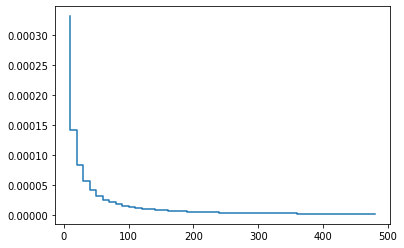

In [131]:
def plot_agn(lower_l, higher_l, a, b):
    energies = np.arange(lower_l, 501, 10)
    _photons = np.array([quad(integrand, l, h, args=(a,b)) for l, h in zip(np.arange(lower_l, 500, 10), np.arange(higher_l, 500, 10))])
    photons = [_photon[0] for _photon in _photons]
    error = [_photon[1] for _photon in _photons]
    return energies, photons, error

lower_l = 10
higher_l = 20
a = 2.092206715e-3
b = 1.56

energies, photons, error = plot_agn(lower_l, higher_l, a, b)
_fig, _ax = plt.subplots()
plt.step(energies[:-2], photons)

In [129]:
len(energies), len(photons)

(50, 48)

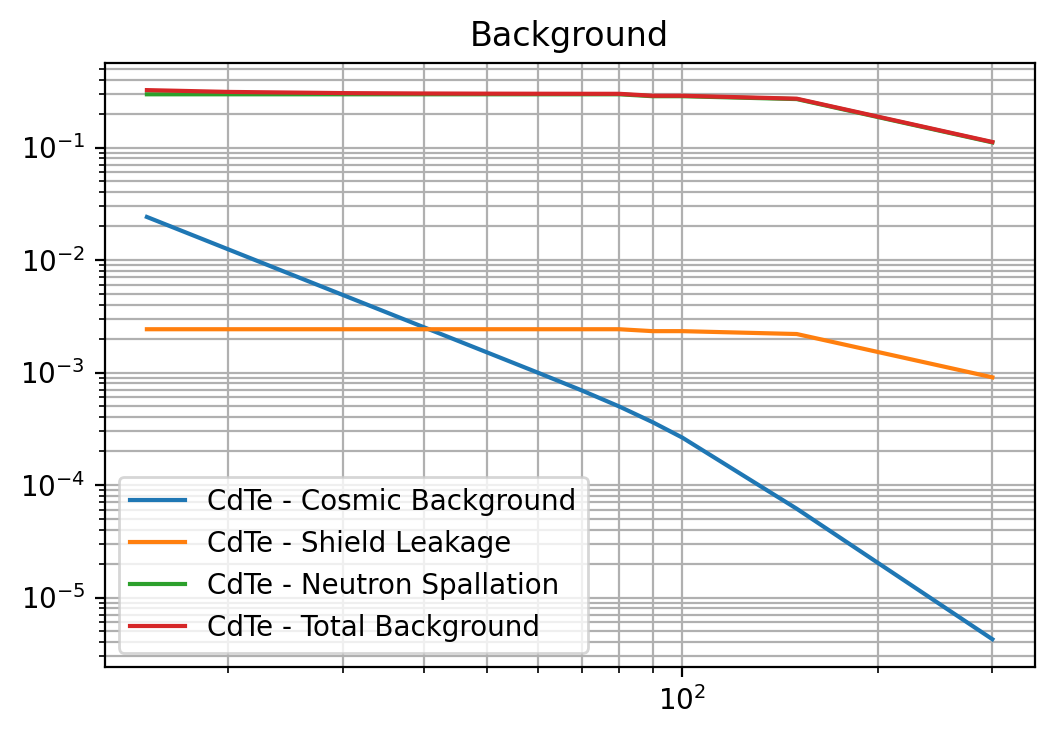

In [90]:
cdte_bg_curves = pd.read_csv('cdtebg.csv')
csi_bg_curves = pd.read_csv('csibg.csv')
cdte_energies = cdte_bg_curves['energy'].values # keV
csi_energies = csi_bg_curves['energy'].values # keV
cdte_mass_attentuation_coefficients = cdte_bg_curves['massatt'].values
csi_mass_attentuation_coefficients = csi_bg_curves['massatt'].values
cdte_background_values = {
    'density' : 5.85, # g/cc
    'shield_thickness' : 0.1, # cm 
    'mass_attentuation_coefficients' : cdte_mass_attentuation_coefficients, 
    'energies' : cdte_energies, # keV
    'solid_angle' : 0.14, # sterdaiens
    'shield_leakage_bg_count_rates' : np.array(cdte_bg_curves['fig8'].values) * 1e-3,
    'rigidity_cut_off' : 1.3,  
    'energy_counts' : cdte_bg_curves['fig5'].values,
    'thickness': 0.2, # cm
    'area': 3466.88, # cm^2
    'material': 'CdTe',
}
csi_background_values = {
    'density' : 4.51, # g/cc
    'shield_thickness' : 0.1, # cm 
    'mass_attentuation_coefficients' : csi_mass_attentuation_coefficients, 
    'energies' : csi_energies, # keV
    'solid_angle' : 0.14, # sterdaiens
    'shield_leakage_bg_count_rates' : np.array(csi_bg_curves['fig8'].values) * 1e-3,
    'rigidity_cut_off' : 1.3,  
    'energy_counts' : csi_bg_curves['fig5'].values,
    'thickness': 3, # cm
    'area': 3466.88, # cm^2
    'material': 'CsI',
}

cdte_bg_noise = sns.Background(**cdte_background_values)
cdte_background = cdte_bg_noise.calculate_bg()
fig, ax = plt.subplots(dpi=200)
ax = cdte_bg_noise.ploty(ax, show_plot=False)

csi_bg_noise = sns.Background(**csi_background_values)
csi_background = csi_bg_noise.calculate_bg()
# ax = csi_bg_noise.ploty(ax, type='efficiency')
# ax = cdte_bg_noise.ploty(ax, type='efficiency')
# fig, ax = plt.subplots()
# ax = csi_bg_noise.ploty(ax, type='efficiency')

In [91]:
print(csi_bg_noise.spallation)
print(csi_bg_noise.shield_leakage)
print(csi_bg_noise.cosmic_bg)
print(csi_bg_noise.total_bg)

[1.60490802 1.28392642 0.906301   0.906301  ]
[0.00119901 0.00090592 0.00063947 0.00063947]
[3.73555276e-05 2.24628678e-05 1.02965857e-05 5.57390859e-06]
[1.60614438 1.2848548  0.90695077 0.90694604]


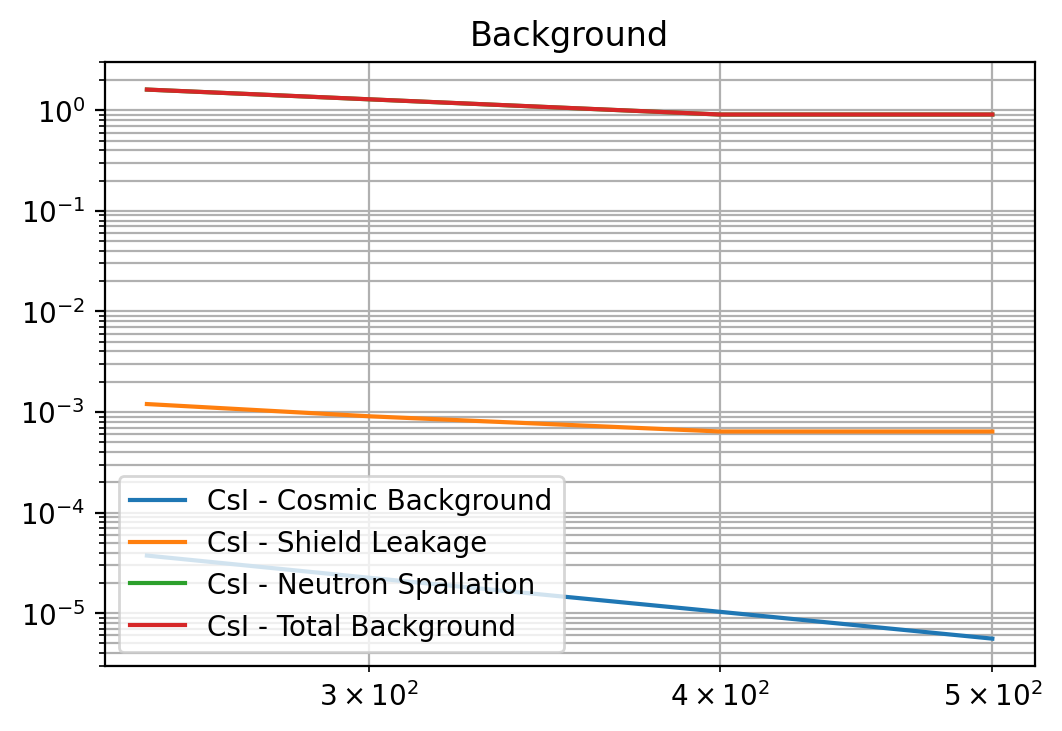

In [92]:
fig1, ax1 = plt.subplots(dpi=200)
ax1 = csi_bg_noise.ploty(ax1)#, type='efficiency')


In [93]:
a = csi_bg_noise.ploty(ax, type='efficiency')
# plt.show()


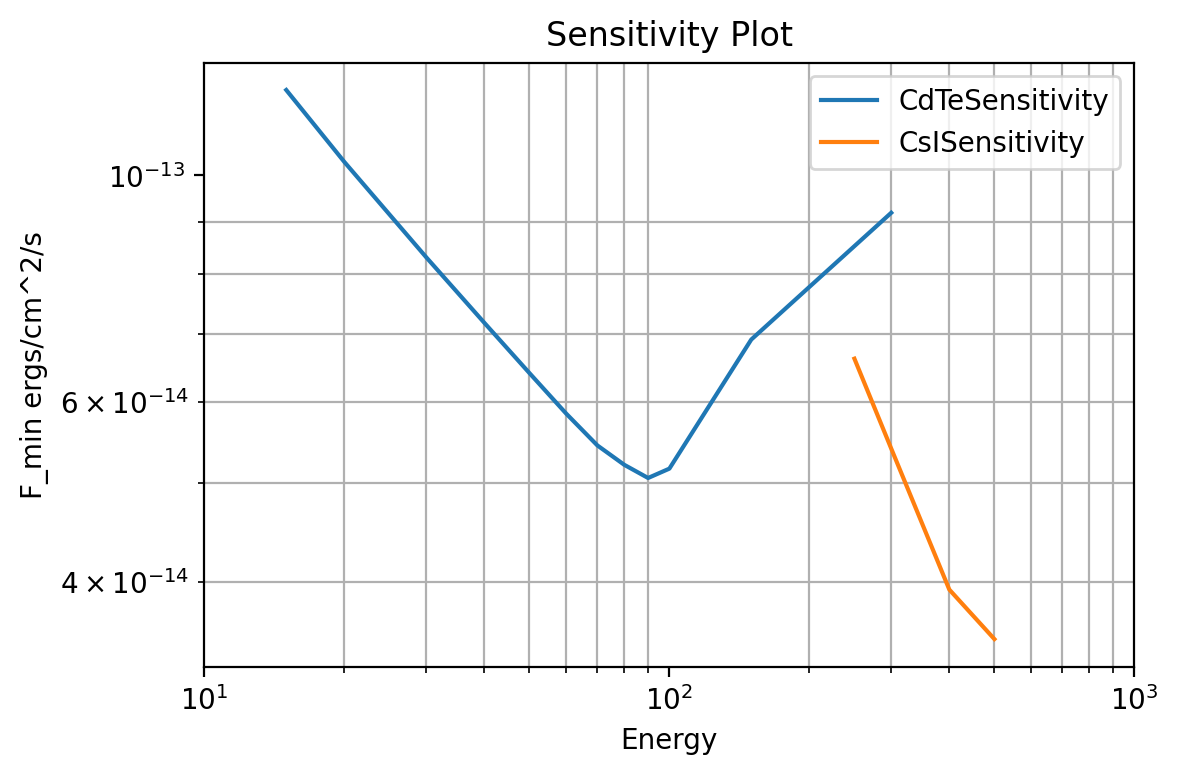

In [99]:
cdte_sensitivity_values = {
    'background_noise' : cdte_background,
    'detector_efficiency' : cdte_bg_noise.efficiencies,
    'energies' : cdte_energies, # keV
    'area' : 3466.85, # cm^2
    'obstime': 0.87 * 48 * 60 * 60,
    'material': 'CdTe',
    'solidangle': 1.4,
}
cdte_sensitivity = sns.Sensitivity(**cdte_sensitivity_values)
cdte_sensitivities = cdte_sensitivity.calculate_sensitivity()
snsfig, snsax = plt.subplots(dpi=200)
snsax = cdte_sensitivity.ploty(snsax, show_plot=False)

csi_sensitivity_values = {
    'background_noise' : csi_background,
    'detector_efficiency' : cdte_bg_noise.efficiencies,
    'energies' : csi_energies, # keV
    'area' : 3466.85, # cm^2
    'obstime': 0.87 * 48 * 60 * 60,
    'material': 'CsI',
    'solidangle': 1.4,
}
csi_sensitivity = sns.Sensitivity(**csi_sensitivity_values)
csi_sensitivities = csi_sensitivity.calculate_sensitivity()
# snsfig, snsax = plt.subplots()
snsax = csi_sensitivity.ploty(snsax, show_plot=False)
snsax.grid()
snsax.set_xlabel('Energy')
snsax.set_ylabel('F_min ergs/cm^2/s')
snsax.set_xlim(10, 1e3)
snsax.grid(which='both')
# snsax.set_ylim(1e-5, 10)
plt.show()

# ax = sensitivity.ploty(ax)
# ax.plot(sensitivity.energies, sensitivity.sensitivities * 1.6022E-09)

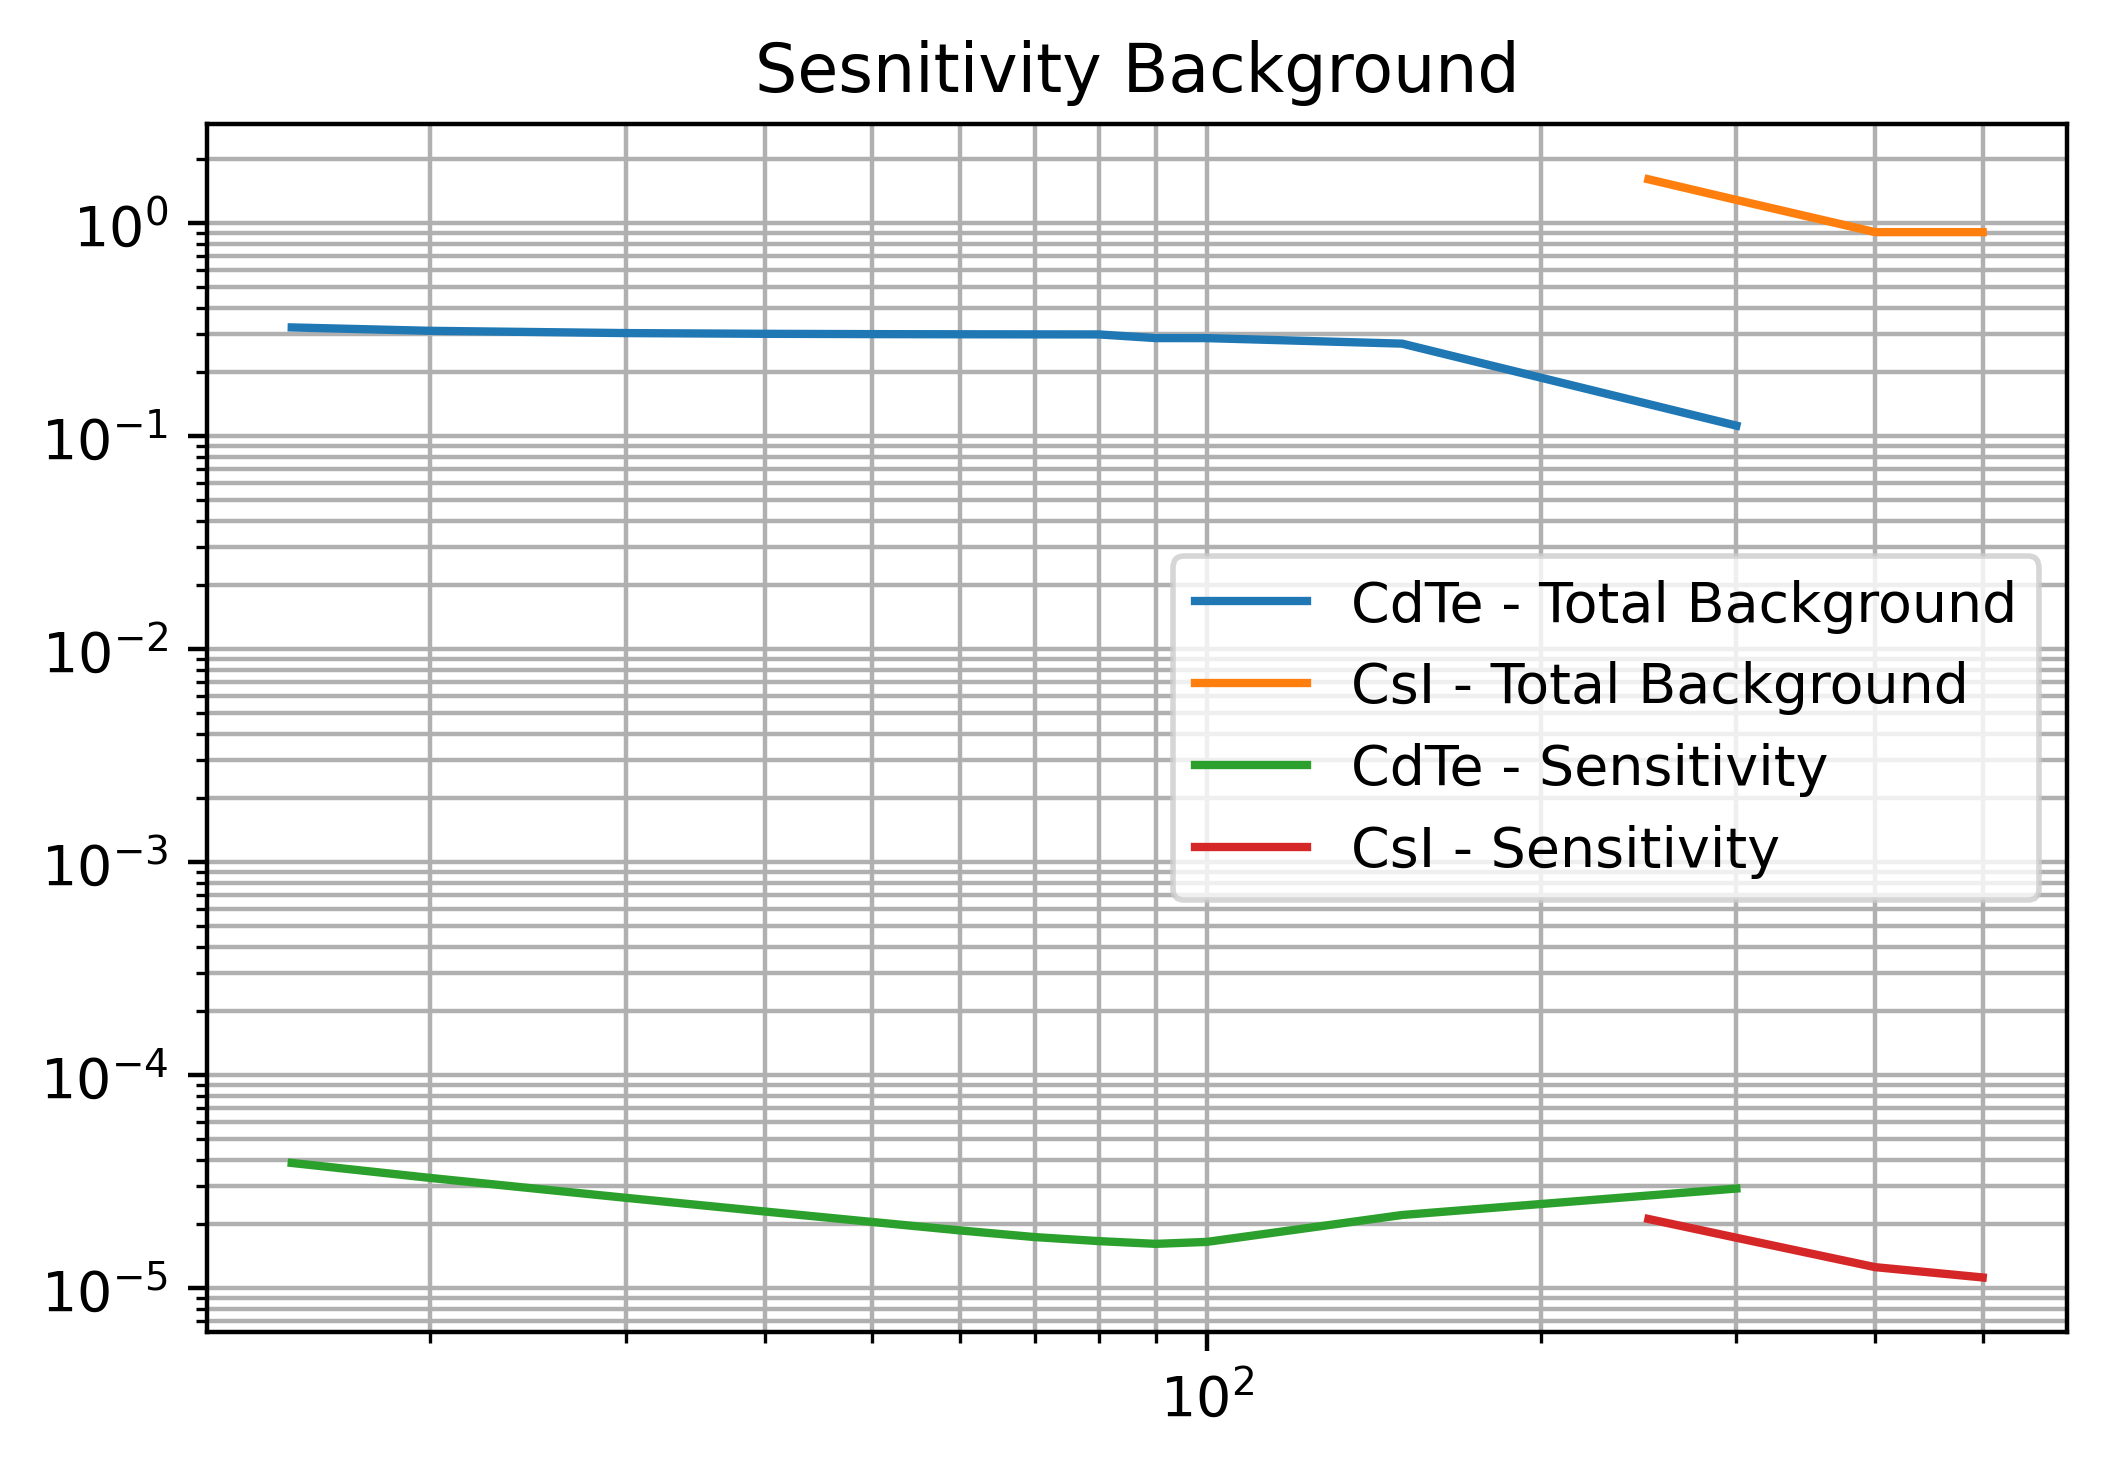

In [108]:
fig2, ax2 = plt.subplots(dpi=400)
ax2.grid(which='both')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(cdte_bg_noise.energies, cdte_bg_noise.total_bg, label='CdTe - Total Background')
ax2.plot(csi_bg_noise.energies, csi_bg_noise.total_bg, label='CsI - Total Background')
ax2.plot(cdte_sensitivity.energies, cdte_sensitivity.sensitivities, label='CdTe - Sensitivity')
ax2.plot(csi_sensitivity.energies, csi_sensitivity.sensitivities, label='CsI - Sensitivity')
ax2.set_title('Sesnitivity Background')
ax2.legend()


# Swift Bat 

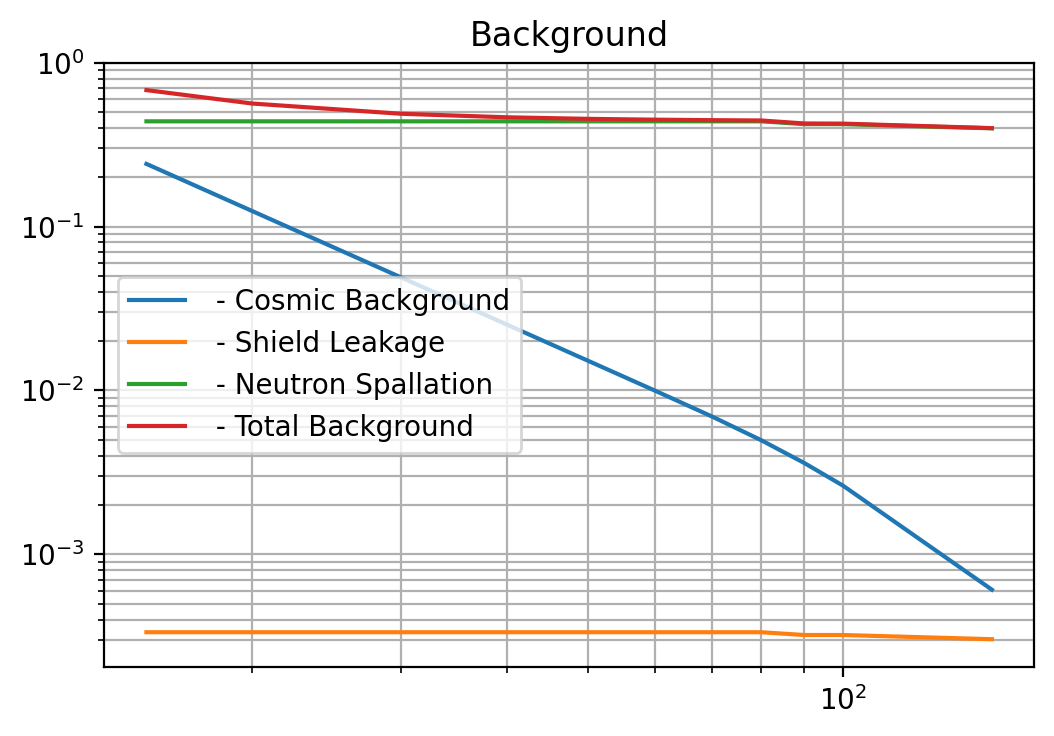

<AxesSubplot:title={'center':'Background'}>

In [95]:
bat_bg_curves = pd.read_csv('batbgcurves.csv')
bat_energies = bat_bg_curves['energy'].values # keV
bat_mass_attentuation_coefficients = bat_bg_curves['massatt'].values
bat_background_values = {
    'density' : 5.76, # g/cc
    'shield_thickness' : 10, # cm 
    'mass_attentuation_coefficients' : bat_mass_attentuation_coefficients, 
    'energies' : bat_energies, # keV
    'solid_angle' : 1.4, # sterdaiens
    'shield_leakage_bg_count_rates' : np.array(bat_bg_curves['fig8'].values) * 1e-3,
    'rigidity_cut_off' : 1.3,  
    'energy_counts' : bat_bg_curves['fig5'].values,
    'thickness': 0.2, # cm
    'area': 5200, # cm^2
    'material': '',
}
bat_bg_noise = sns.Background(**bat_background_values)
bat_background = bat_bg_noise.calculate_bg()
batfig, batax = plt.subplots(dpi=200)
bat_bg_noise.ploty(batax)


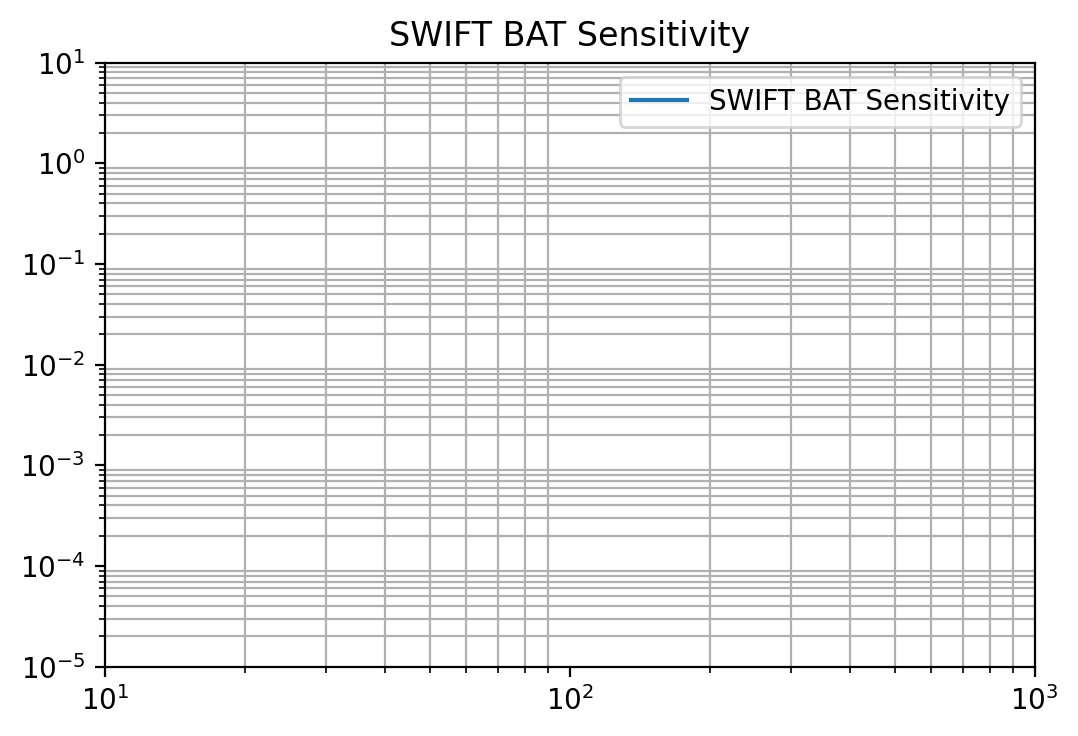

In [96]:
bat_sensitivity_values = {
    'background_noise' : bat_background,
    'detector_efficiency' : bat_bg_noise.efficiencies,
    'energies' : bat_energies, # keV
    'area' : 5200, # cm^2
    'obstime': 0.87 * 48 * 60 * 60,
    'material': '',
    'solidangle': 1.4,
}
bat_sensitivity = sns.Sensitivity(**bat_sensitivity_values)
bat_sensitivities = bat_sensitivity.calculate_sensitivity()
batfig, batax = plt.subplots(dpi=200)
batax = bat_sensitivity.ploty(batax, show_plot=False)
batax.set_xlim(10, 1e3)
batax.set_ylim(1e-5, 10)
batax.set_title('SWIFT BAT Sensitivity')
batax.legend(['SWIFT BAT Sensitivity'])
plt.show()


AttributeError: module 'sensitivity' has no attribute 'sensitivity'

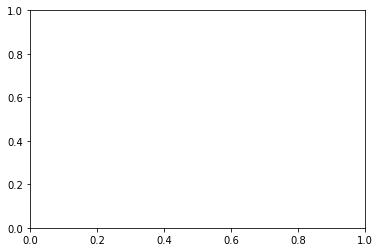

In [97]:
figc, axc = plt.subplots()
axc.plot(sns.sensitivity.energies, sns.sensitivity.sensitivities, label='Our Mission')
axc.plot(bat_sensitivity.energies, bat_sensitivity.sensitivities, label='Swift Bat')
axc.legend()